# Programming Assignment 1: LASSO

### Instructor: Yuanyuan Shi

### Teaching Assistants

- Yuexin Bian, [yubian@ucsd.edu]
- Tz-Ying Wu, [tzw001@ucsd.edu]

## Instructions
1. This assignment must be completed individually.  
2. This notebook contains skeleton code, which should not be modified
3. You must run all cells in this notebook and submit this notebook as an .ipynb file.
4. You must submit the .ipynb on Gradescope.

## Setup

In [1]:
import numpy as np
from numpy import linalg
import scipy
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.model_selection import train_test_split
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline
# Comment it if you are not using mac
%config InlineBackend.figure_format = 'retina'

## Implement coordinate descent 

In [2]:
#TODO: You should initialize w_0 and w
# Initialize w_0 to be 0, and initialize vector w that each element follows gaussian distribution (0, 1)
# Implement algorithm following algorithm 1
def lasso(X, y, reg):
    """
    Args:
        X: (N, d) 
        y: (N, 1)
        reg: regularization coefficient lambda
    Returns:
        w: (d, 1) weight vector
        w0: unregularized term
    """
    def myloss(w, w0):
        return np.sum((y-np.dot(X,w)-w0)**2)+reg*np.sum(np.abs(w))
    
    N, d = X.shape
    np.random.seed(0)
    w = np.random.normal(size=(d,1))
    w0 = 0.0
    threshold = 0.001
    change = 1.0
    ite = 0
    loss = 114514
    while change > threshold:
        ypred = np.dot(X, w) + w0
        new_w0 = w0+np.sum(y-ypred)/N
        change = (new_w0 - w0)**2
        w0 = new_w0
        newloss = myloss(w,w0)
        assert newloss <= loss
        loss = newloss
        for k in range(d):
            ak = 2 * np.sum(X[:,k]**2)
            ck = 2 * sum(X[i,k]*(y[i,0]-w0-np.dot(X[i,:],w)+X[i,k]*w[k,0]) for i in range(N))
            thr1, thr2 = (ck-reg)/ak, (ck+reg)/ak
            if (ck-reg)/ak >= 0:
                new_wk = (ck-reg)/ak
            elif (ck+reg)/ak > 0:
                new_wk = 0.0
            else:
                new_wk = (ck+reg)/ak
            change = change + (new_wk - w[k,0])**2
            #print(new_wk)
            w[k,0] = new_wk
            newloss = myloss(w,w0)
            assert newloss <= loss
            loss = newloss
        #print(w,w0)
        ite += 1
        '''if ite % 10 == 0:
            print("iteration {}, change of w is {}".format(ite, change))'''
    print("iteration {}, change of w is {}, calculation end".format(ite, change))
    return w, w0

## Dataset: synthetic data (15 points)
### 1. Generate data X, y
### 2. solve multiple lasso problems on a regularization path
### 3. Plot the precision and recall via regularizations

In [3]:
#TODO: generate true weight vector and weight following assignment
def generate_true_w(d, K):
    """
    Args:
        d: int dimension of the input data X (N, d)
        K: int, the number of useful features
    Returns:
        w: (d,1) weight vector
        w0: unregularized term
    """
    np.random.seed(0)
    w = np.ones((K,1))*10.0
    for i in range(K):
        if np.random.rand() < 0.5:
            w[i,0] = -10.0
    w = np.vstack((w, np.zeros((d-K,1))))
    w0 = 0.0
    return w, w0

#TODO: generate true weight vector and weight following assignment
def generate_data(w, w0, N, d, sigma):
    """
    Args:
        w: (d,1) weight vector
        w0: unregularized term
        N: int, the number of data samples
        d: int, dimension of the input data X (N, d)
        sigma: standard deviation of gaussian noise to generate y
    Returns:
        X: array (N, d)
        y: array (N, 1)
    """
    np.random.seed(0)
    X = np.random.normal(size=(N,d),scale=1.0)
    y = np.dot(X,w)+np.random.normal(size=(N,1), scale=sigma)+w0
    return X, y


#TODO: compute max lambda follow equation (2) in assignment document
def compute_lambdamax(X, y):
    """
    Args:
        X: (N,d) input data
        y: (N,1) input label
    Returns:
        maxreg: int, estimated max value of regularization term
    """
    maxreg = 20.0
    return maxreg

# Using the plot function to generate plots
def plot(regs, precision, recall):
    print(regs)
    print(precision)
    print(recall)
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    ax[0].plot(regs, precision, label='precision')
    ax[1].plot(regs, recall, label='recall')
    ax[0].set_xlabel('L1 regularization strength')
    ax[1].set_xlabel('L1 regularization strength')
    ax[0].set_title('Precision')
    ax[1].set_title('Recall')
    plt.show()


20.0
iteration 14, change of w is [0.00018128], calculation end
iteration 23, change of w is [0.00098076], calculation end
iteration 47, change of w is [0.00099685], calculation end
iteration 87, change of w is [0.00097854], calculation end
iteration 136, change of w is [0.00097467], calculation end
iteration 165, change of w is [0.00099469], calculation end
iteration 133, change of w is [0.00099643], calculation end
iteration 18, change of w is [0.00095275], calculation end
iteration 17, change of w is [0.00082876], calculation end
iteration 17, change of w is [0.00070947], calculation end
iteration 17, change of w is [0.00067334], calculation end
iteration 17, change of w is [0.00066116], calculation end
iteration 17, change of w is [0.00065654], calculation end
iteration 17, change of w is [0.00065459], calculation end
iteration 17, change of w is [0.00065371], calculation end
iteration 17, change of w is [0.0006533], calculation end
iteration 17, change of w is [0.0006531], calcula

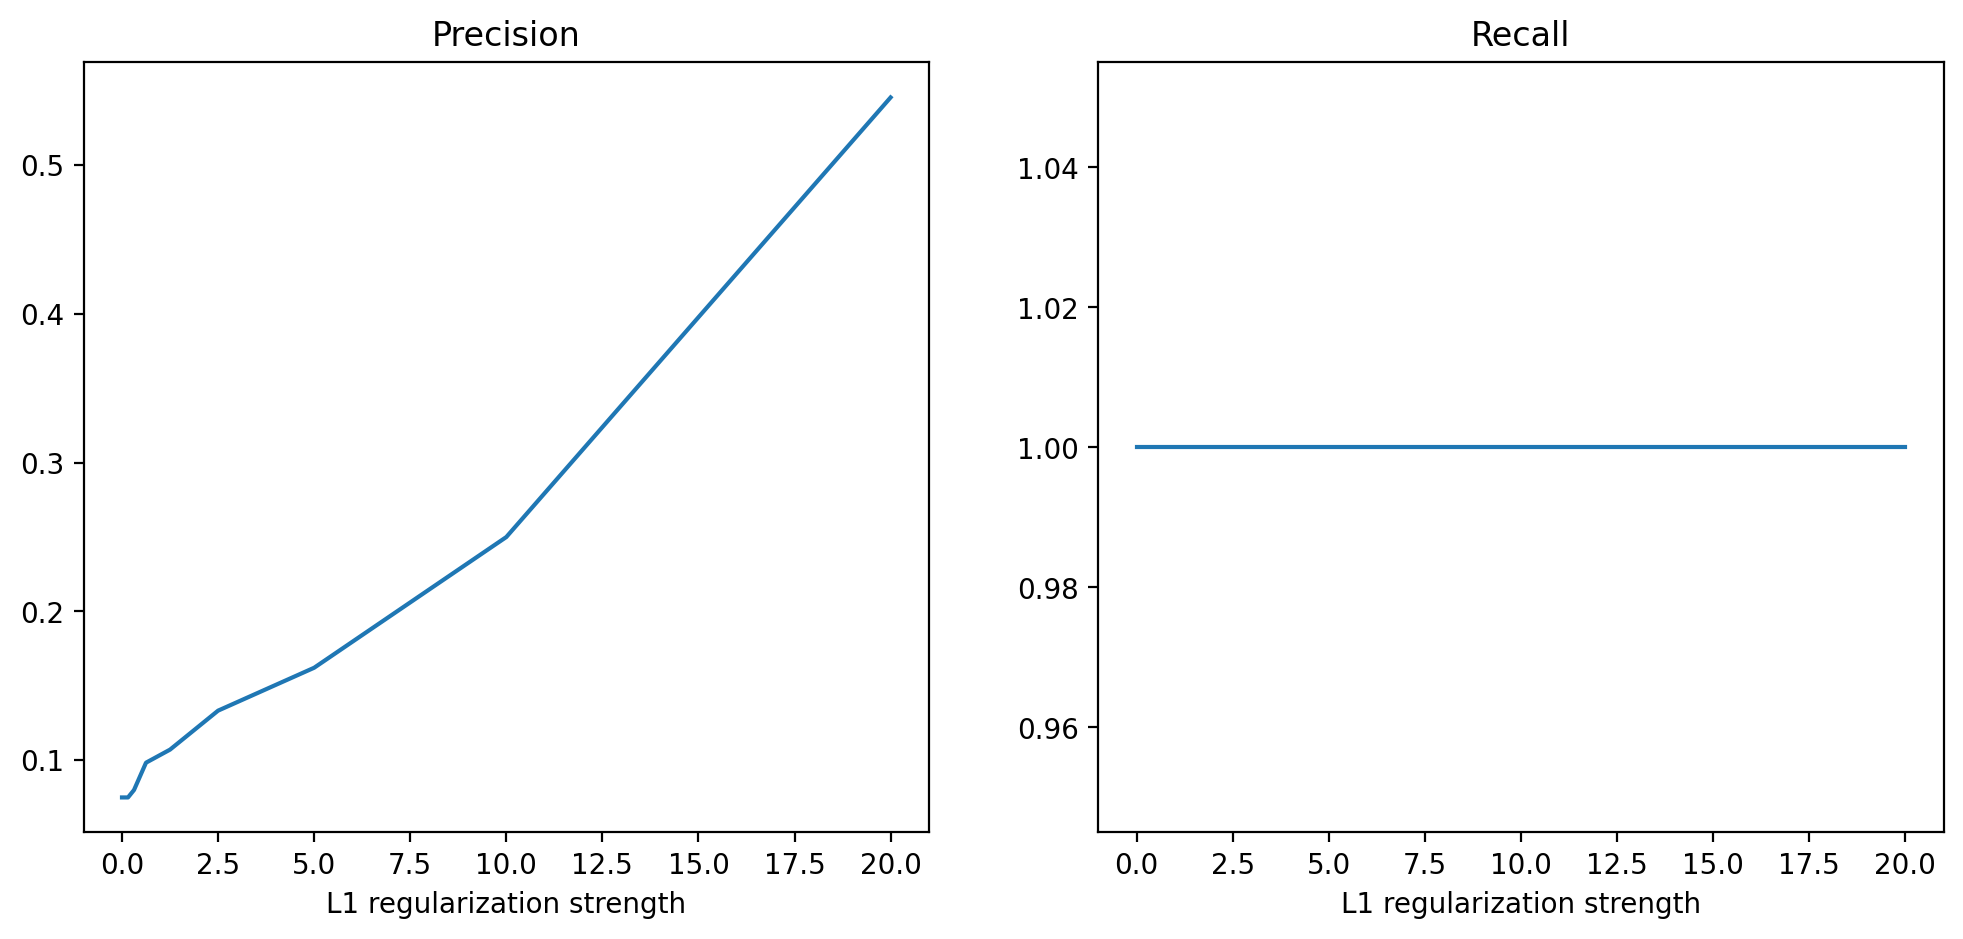

iteration 14, change of w is [0.00018128], calculation end
[ 10.  10.  10.  10. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.] [ 9.5383301   9.96497833  9.86289951  9.6824163  -9.57864225  9.60277568
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.05738662  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.  

In [4]:
#TODO
# Conduct experiments in 2.2 Dataset: synthetic data
K, d, N = 6, 80, 50
w, w0 = generate_true_w(d=d, K=K)
X, y = generate_data(w, w0, N=N, d=d, sigma=1)
reg = compute_lambdamax(X, y)
print(reg)

# Feel free to change this decreasing ratio
ratio = 2

regs = np.zeros(20)
precision = np.zeros(20)
recall = np.zeros(20)
for i in range(20):
    pred_w, pred_w0 = lasso(X, y, reg)
    if(np.count_nonzero(pred_w)==0):
        precision[i] = 1
    else:
        precision[i] = np.count_nonzero(pred_w[:K])/np.count_nonzero(pred_w)
    recall[i] = np.count_nonzero(pred_w[:K])/K
    regs[i] = reg
    reg = reg/ratio

plot(regs, precision, recall)
pred_w, pred_w0 = lasso(X, y, 20)
print(w.flatten(),pred_w.flatten())
print(w0,pred_w0)

## Dataset: Water quality data (20 points)
### 1. Load data X, y
## For predicting the water quality data for the first location and second location
### 2. find good regularization coefficient, record RMSE for training data, validation data and test data
### 3. list largest weight magnitude and the names of features

In [5]:
def prepare_set(X_train, X_test, y_train, y_test, loc=0):
    X_train_1 = np.zeros((423, 11))
    X_test_1 = np.zeros((282, 11))
    for i in range(423):
        X_train_1[i,:] = X_train[0,i][loc]
        if i < 282: X_test_1[i,:] = X_train[0,i][loc]
    y_train_1 = y_train[0].reshape(-1, 1)
    y_test_1 = y_test[0].reshape(-1, 1)
    X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=0)
    return X_train_1, X_val_1, X_test_1, y_train_1, y_val_1, y_test_1

def compute_rmse(y, ypred):
    return np.sqrt(((y - ypred) ** 2).mean())

def plot2(regs, train_rmse, val_rmse):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    ax[0].plot(regs, train_rmse, label='Training RMSE')
    ax[1].plot(regs, val_rmse, label='Validation RMSE')
    ax[0].set_xlabel('L1 regularization strength')
    ax[1].set_xlabel('L1 regularization strength')
    ax[0].set_title('Training RMSE')
    ax[1].set_title('Validation RMSE')
    plt.show()

# Read data
data_file = "water_dataset.mat"   
data = scipy.io.loadmat(data_file)
X_train, X_test = data['X_tr'], data['X_te']
y_train, y_test = data['Y_tr'], data['Y_te']

# Change location using loc parameters
X_train_1, X_val_1, X_test_1, y_train_1, y_val_1, y_test_1 = prepare_set(X_train, X_test, y_train, y_test, loc=0) 


print('X_train.shape', X_train_1.shape, 'X_validate.shape', X_val_1.shape, 'X_test.shape', X_test_1.shape)
print('y_train.shape', y_train_1.shape, 'y_validate.shape', X_val_1.shape, 'y_test.shape', y_test_1.shape)

X_train.shape (338, 11) X_validate.shape (85, 11) X_test.shape (282, 11)
y_train.shape (338, 1) y_validate.shape (85, 11) y_test.shape (282, 1)


iteration 32, change of w is 0.0008139203488004747, calculation end
iteration 47, change of w is 0.0004623287864316574, calculation end
iteration 48, change of w is [0.00098842], calculation end
iteration 26, change of w is [0.00091143], calculation end
iteration 37, change of w is [0.00054469], calculation end
iteration 23, change of w is [0.00099237], calculation end
iteration 15, change of w is [0.00087417], calculation end
iteration 11, change of w is [0.00090128], calculation end
iteration 9, change of w is [0.00092723], calculation end
iteration 9, change of w is [0.00078616], calculation end
iteration 8, change of w is [0.00094213], calculation end
iteration 8, change of w is [0.00089551], calculation end
iteration 8, change of w is [0.00086736], calculation end
iteration 8, change of w is [0.00084988], calculation end
iteration 8, change of w is [0.00083881], calculation end
iteration 8, change of w is [0.00083169], calculation end
iteration 8, change of w is [0.00082705], calc

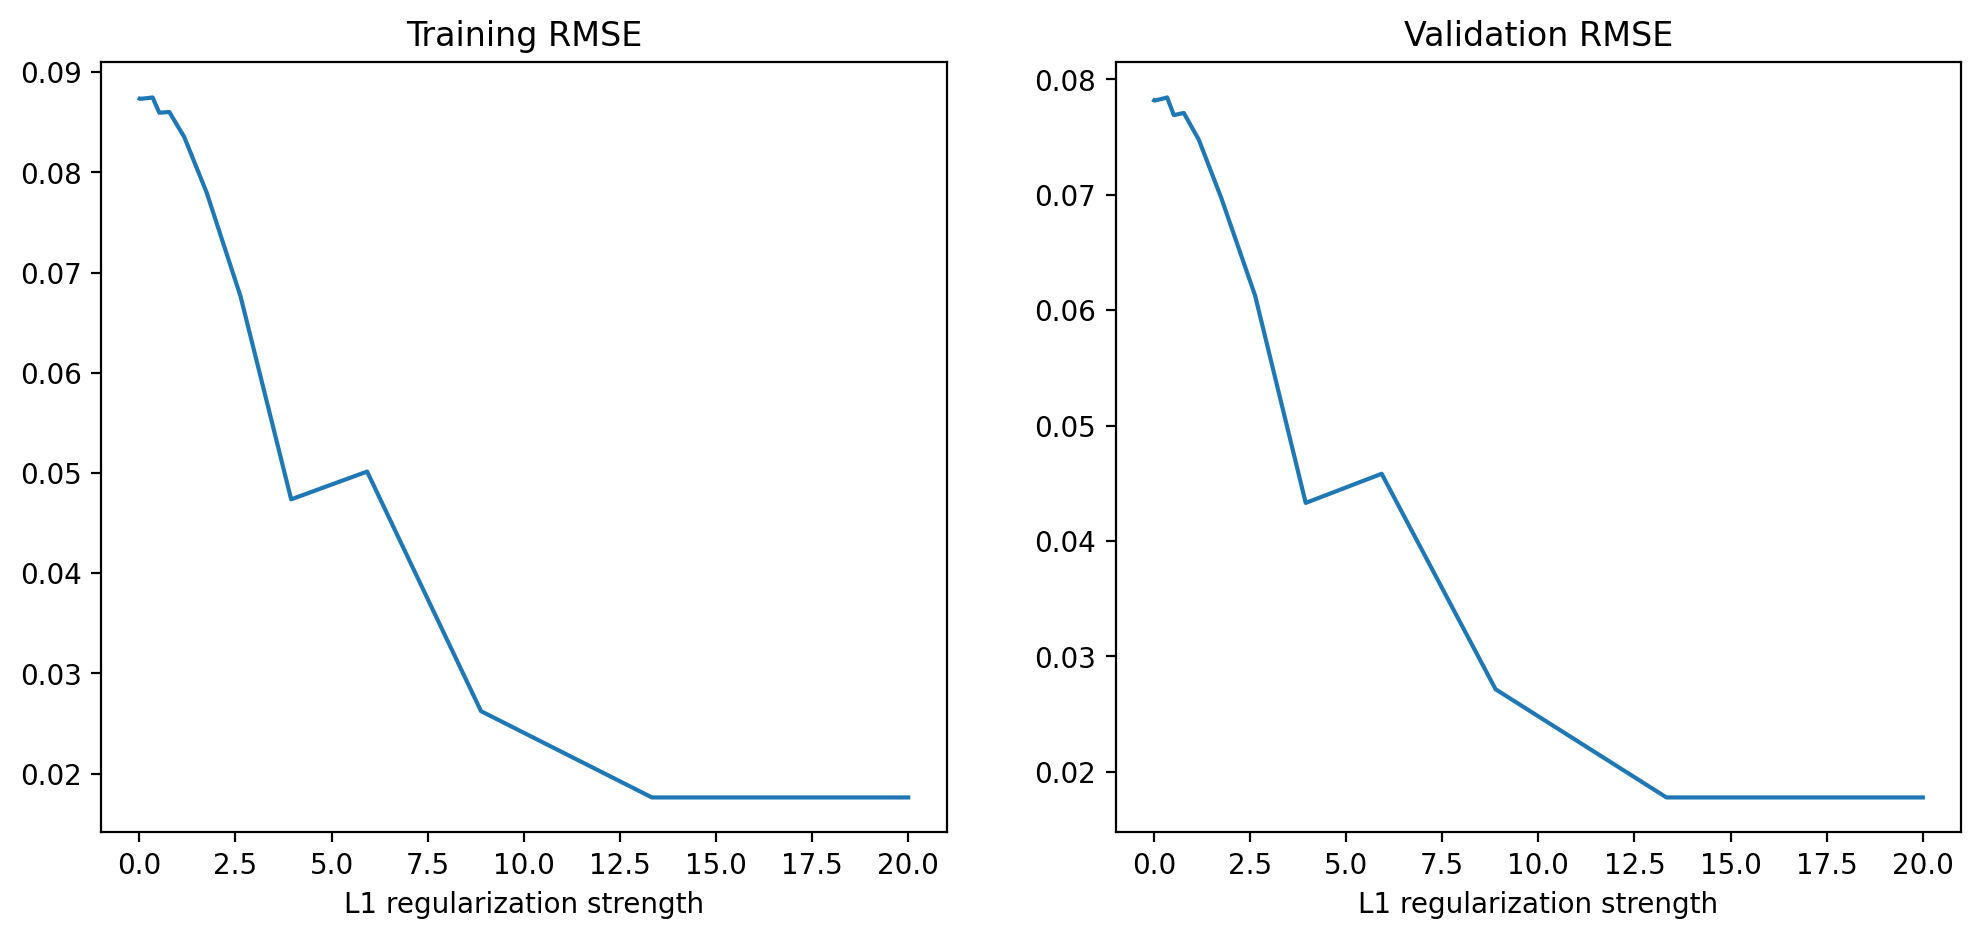

In [6]:
#TODO
# Conduct experiments: 2.3 Water quality prediction
reg = 20
ratio = 1.5
regs = np.zeros(20)
train_rmse = np.zeros(20)
val_rmse = np.zeros(20)
for i in range(20):
    pred_w, pred_w0 = lasso(X_train_1, y_train_1, reg)
    train_rmse[i] = compute_rmse(y_train_1, np.dot(X_train_1, pred_w)+pred_w0)
    val_rmse[i] = compute_rmse(y_val_1, np.dot(X_val_1, pred_w)+pred_w0)
    regs[i] = reg
    reg = reg/ratio

plot2(regs, train_rmse, val_rmse)

In [7]:
#2.3(b)
bestmodel = np.argmin(val_rmse)
print("best model is lambda=", regs[bestmodel])

best model is lambda= 20.0


In [8]:
pred_w, pred_w0 = lasso(X_train_1, y_train_1, regs[bestmodel])
train_rmse = compute_rmse(y_train_1, np.dot(X_train_1, pred_w)+pred_w0)
test_rmse = compute_rmse(y_test_1, np.dot(X_test_1, pred_w)+pred_w0)
print("train_rmse is", train_rmse)
print("test_rmse is", test_rmse)

iteration 32, change of w is 0.0008139203488004747, calculation end
train_rmse is 0.017623793185265326
test_rmse is 0.01739853808913264


In [9]:
#2.3(c)
print(pred_w.flatten())
print(pred_w0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.6489425816348893


In [10]:
print(y_train_1.flatten())
print(np.average(y_train_1))

[0.64814815 0.65740741 0.64814815 0.63888889 0.66666667 0.66666667
 0.66666667 0.63888889 0.64814815 0.64814815 0.63888889 0.66666667
 0.64814815 0.60185185 0.64814815 0.63888889 0.64814815 0.65740741
 0.66666667 0.64814815 0.63888889 0.62962963 0.63888889 0.64814815
 0.64814815 0.66666667 0.64814815 0.68518519 0.59259259 0.64814815
 0.65740741 0.62037037 0.65740741 0.61111111 0.62962963 0.64814815
 0.64814815 0.63888889 0.66666667 0.65740741 0.66666667 0.67592593
 0.66666667 0.65740741 0.66666667 0.62037037 0.63888889 0.62962963
 0.62962963 0.62037037 0.66666667 0.64814815 0.64814815 0.66666667
 0.59259259 0.62037037 0.65740741 0.67592593 0.63888889 0.64814815
 0.63888889 0.64814815 0.63888889 0.65740741 0.62037037 0.62962963
 0.65740741 0.65740741 0.64814815 0.62962963 0.64814815 0.64814815
 0.65740741 0.66666667 0.64814815 0.64814815 0.65740741 0.65740741
 0.66666667 0.61111111 0.64814815 0.64814815 0.62037037 0.64814815
 0.62962963 0.65740741 0.66666667 0.61111111 0.66666667 0.6111

In [11]:
from sklearn.linear_model import Lasso, LinearRegression

mymodel = Lasso(alpha=1)
mymodel.fit(X_train_1, y_train_1)
print(mymodel.coef_, mymodel.intercept_)
print(compute_rmse(y_train_1, mymodel.predict(X_train_1)))
print(compute_rmse(y_test_1, mymodel.predict(X_test_1)))

mymodel = LinearRegression()
mymodel.fit(X_train_1, y_train_1)
print(mymodel.coef_, mymodel.intercept_)
print(compute_rmse(y_train_1, mymodel.predict(X_train_1)))
print(compute_rmse(y_test_1, mymodel.predict(X_test_1)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.64894258]
0.017623793185265326
0.017398538089132696
[[ 0.74801597  0.19538889  0.67130376 -2.23482247  0.0995674   0.45574768
   0.00898892 -0.04695627  0.14288624 -0.03252941 -0.08676006]] [0.04307939]
0.003960391040851401
0.026083079165778993


iteration 37, change of w is [0.00052343], calculation end


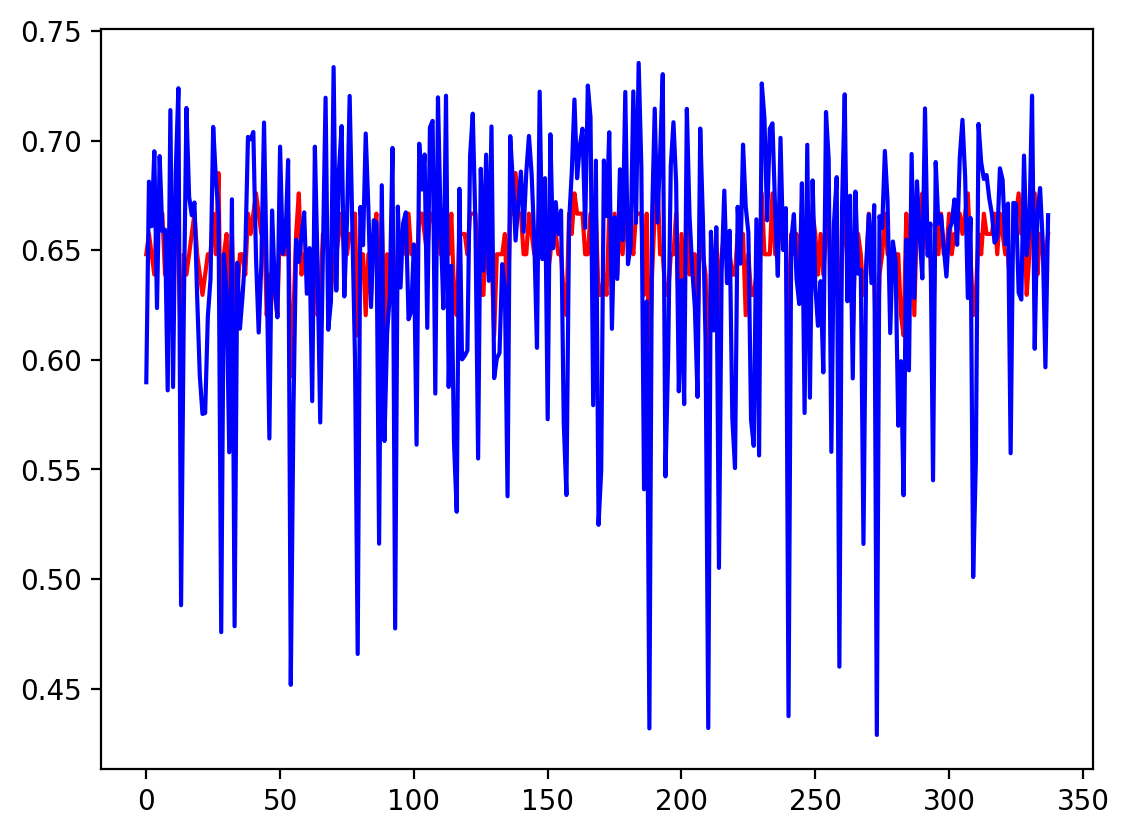

0.01739853808913264


In [12]:
#just a test, not a part of the homework
pred_w, pred_w0 = lasso(X_train_1, y_train_1, 4.0)
myx = np.arange(0,len(y_train_1))
ypred = np.dot(X_train_1, pred_w)+pred_w0
plt.plot(myx, y_train_1, c="r")
plt.plot(myx, ypred, c="b")
plt.show()
print(test_rmse)

In [13]:
from scipy.stats import pearsonr
for i in range(11):
    print(pearsonr(X_train_1[:,i].flatten(), y_train_1.flatten())[0])

0.2697644174803715
0.9301087629234153
0.520228132676279
0.47180075467128657
0.26167184932802834
0.9581577541402907
0.19624609922016728
0.18159033901167795
0.2244518735852027
0.22608550753717518
0.2209086073832247
